In [63]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

# Derivadas Parciais

In [64]:
def f(my_x, my_y): # f(x,y) = x² - y²
    return my_x**2 - my_y**2

In [65]:
xs = np.linspace(-3, 3, 1000) # plottando z para valores variados de x

In [66]:
zs_wrt_x = f(xs, 0)  # y constante

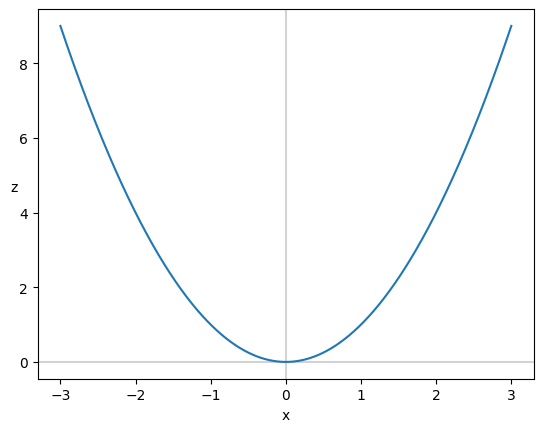

In [67]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0) # z no lugar do y pq é 2D
_ = ax.plot(xs, zs_wrt_x)

para determinar a slope de z com relação a x, podemos usar a deridvada parcial:


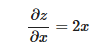

In [68]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [69]:
x_samples = [-2, -1, 0, 1, 2]
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [70]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col): # curva toda, x especifico, valor y, funcao, derivada de interesse, cor

    my_z = my_f(my_x, my_y) # z = f(x, y)
    plt.scatter(my_x, my_z, c=col, zorder=3) # cosmetic

    tangent_m = fprime(my_x, my_y) # Slope é a derivada parcial de f(x, y) em relacao a x
    tangent_b = my_z - tangent_m*my_x # linha is z=mx+b, so b=z-mx / y-intercept
    tangent_line = tangent_m*my_xs + tangent_b # y = mx + b

    plt.plot(my_xs, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3)

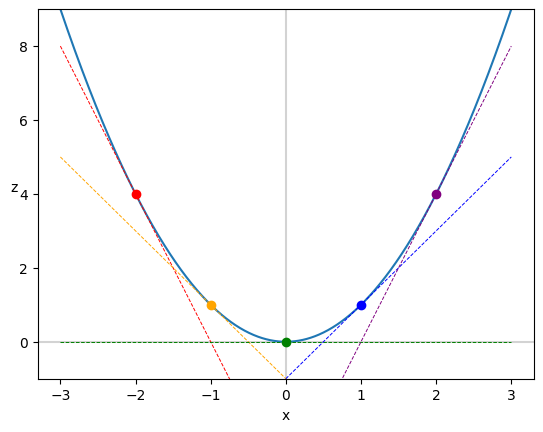

In [71]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i]) #wrt = with relation to

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)


derivada de z em relação a y

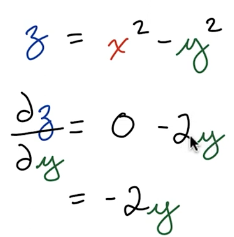

In [72]:
ys = np.linspace(-3, 3, 1000)
zs_wrt_y = f(0, ys)

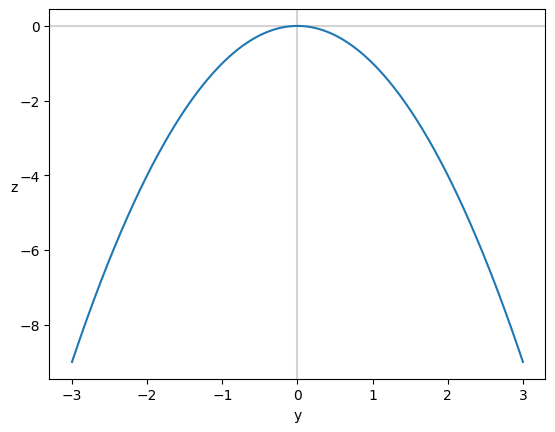

In [73]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)


In [74]:
zs_wrt_y = f(2, ys) # ao mudar o valor de 0, não impacta na curva nem slope

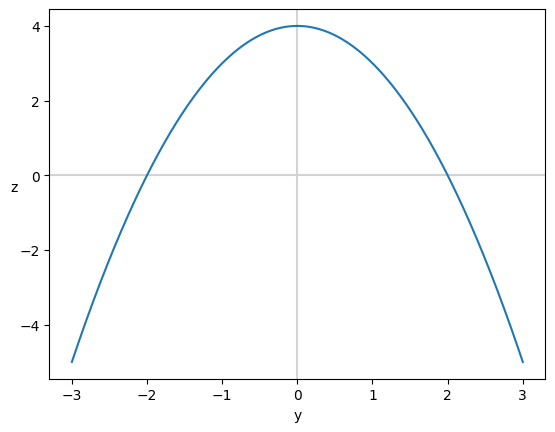

In [75]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [76]:
def delz_dely(my_x, my_y):
    return -2*my_y

y_samples = [-2, -1, 0, 1, 2]

In [77]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y)
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y

    tangent_m = fprime(my_x, my_y)
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys

    plt.plot(my_ys, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

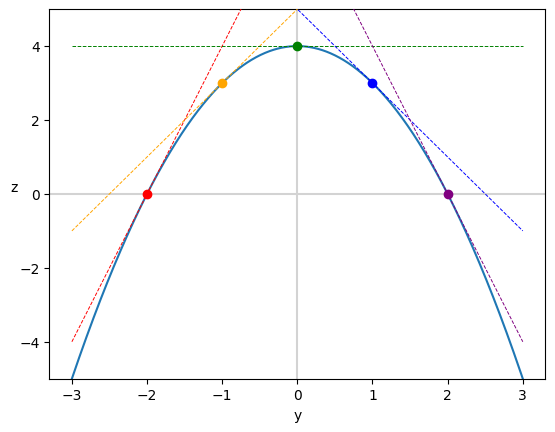

In [78]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

## Derivadas Parciais com Pytorch

In [79]:
x = torch.tensor(5.).requires_grad_()
x

tensor(5., requires_grad=True)

In [80]:
y = torch.tensor(2.).requires_grad_()
y

tensor(2., requires_grad=True)

In [81]:
z = f(x, y) # forward pass
z

tensor(21., grad_fn=<SubBackward0>)

In [82]:
z.backward() # autodiff

In [83]:
x.grad # derivada parcial de x

tensor(10.)

In [84]:
y.grad # derivada parcial de y

tensor(-4.)

## Derivadas Parciais do volume de um Cilindro

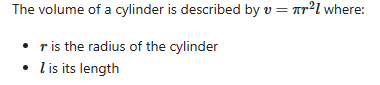

In [85]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l


In [86]:
# Let's say the radius is 3 meters...
r = torch.tensor(3.).requires_grad_()
r


tensor(3., requires_grad=True)

In [87]:
# ...and length is 5 meters:
l = torch.tensor(5.).requires_grad_()
l


tensor(5., requires_grad=True)

In [88]:
# Then the volume of the cylinder is 141.4 cubic meters:
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [89]:
v.backward()

In [90]:
l.grad

tensor(28.2743)

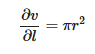

In [91]:
math.pi * 3**2


28.274333882308138

This means that with r = 3, a change in length
 by one unit corresponds to a change in
 of 28.27m³. We can prove this to ourselves:



In [92]:
cylinder_vol(3,6)

169.64600329384882

In [93]:
cylinder_vol(3,6) - cylinder_vol(3,5)

28.274333882308127

# Linear Regression Fit Point by Point

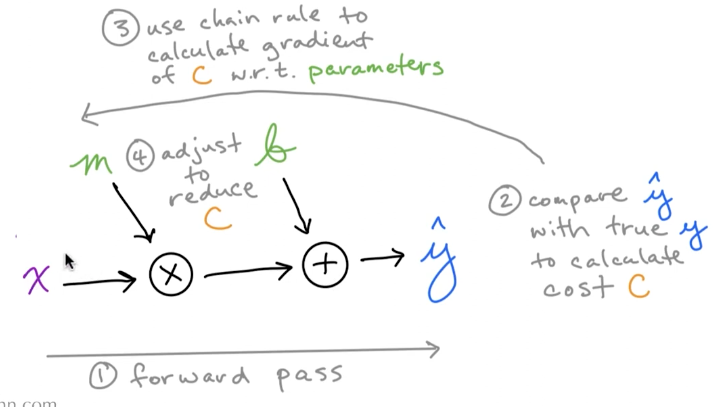

Calculamos o gradiente do custo quadrático em respeito to a straight-line regression model's parameters.

Mantemos as derivadas parciais mais simples possíveis limitando o modelo à lidar com um data point por vez.


In [94]:
import torch

xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])


In [95]:
def regression(my_x, my_m, my_b): # mx + b
    return my_m*my_x + my_b

In [96]:
m = torch.tensor([0.9]).requires_grad_() # iniciar m e b com valores random perto de zero
b = torch.tensor([0.1]).requires_grad_()

In [97]:
i = 7
x = xs[i] # começando do final e iterando com i
y = ys[i]

In [98]:
x

tensor(7.)

In [99]:
y

tensor(-1.3700)

In [100]:
# 1. forward pass, passsando inputs nos parametros e estimando y
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

In [101]:
# 2. comparamos valor estimado de y com o real y para calcular o custo
# custo quadrático: C = (yhat - y)²
def squared_error(my_yhat, my_y):
  return (my_yhat - my_y)**2

In [102]:
C = squared_error(yhat, y)
C # ENORME ERRADÃO

tensor([60.3729], grad_fn=<PowBackward0>)

In [103]:
# 3. usando autodiff para calcular o gradiente de C em respeito aos params
C.backward()

In [104]:
m.grad # derivada parcial do custo em relação à m (del C / del m)

tensor([108.7800])

In [105]:
# em relação à b (del C / del B)
b.grad

tensor([15.5400])

### ILUSTRANDO O QUE AUTODIFF FAZ COM DERIVADAS PARCIAIS

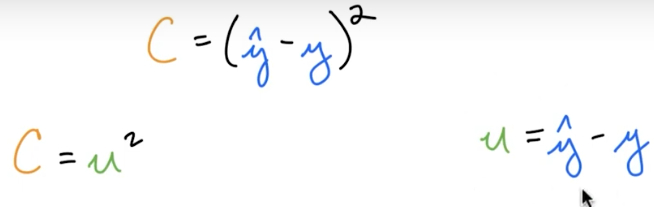

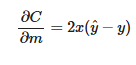

In [106]:
2*x*(yhat.item()-y)

tensor(108.7800)

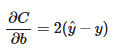

In [107]:
2*(yhat.item() - y)

tensor(15.5400)

# Gradient of Cost, ∇C

Vetor de todas as derivadas parciais de C de acordo com todos os parâmetros individuais do modelo.

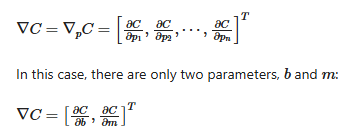

In [108]:
gradient = torch.tensor([[b.grad.item(),m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

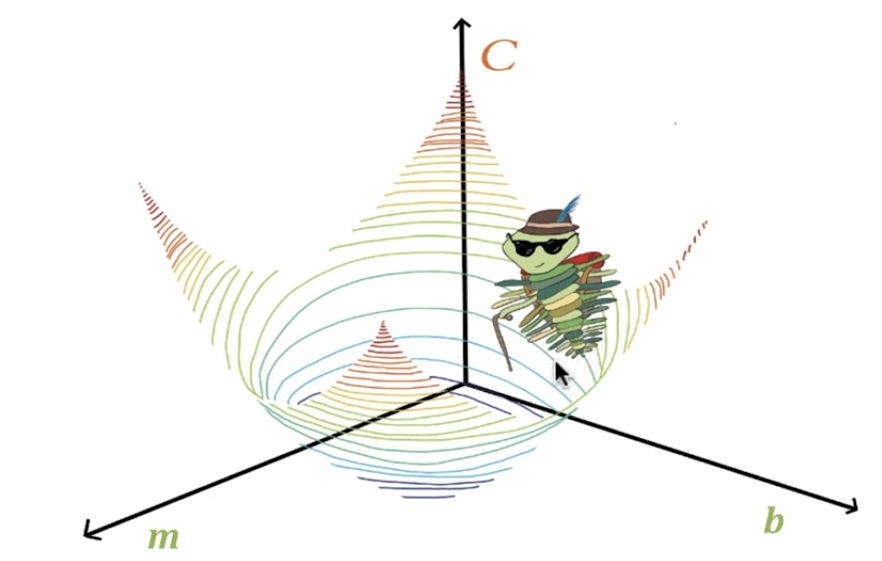

## Gradient of Cost on a Batch of Data

- Calcular o gradiente do mean squared error num batch de dados
- Visualizar o gradiente descendendo

In [109]:
import torch
import matplotlib.pyplot as plt

xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [110]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [111]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()


1. Forward Pass

In [112]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

2. Comparar yhat com y para cálculo de custo C

Com mean squared error
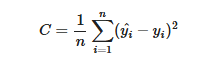

In [113]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [114]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

3. Autodiff para o calculo do C

In [115]:
C.backward()

In [116]:
m.grad, b.grad

(tensor([36.3050]), tensor([6.2650]))

Após derivar:
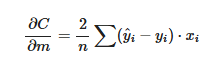

In [117]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

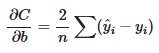

In [118]:
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

In [119]:
# não precisa criar necessariamente
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

In [120]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    fig, ax = plt.subplots()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

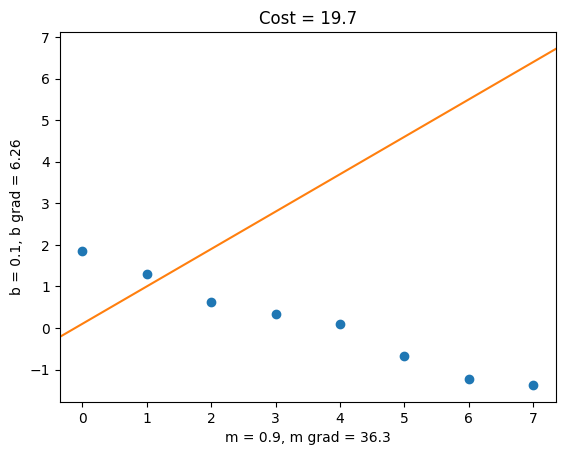

In [121]:
labeled_regression_plot(xs, ys, m, b, C)

4. Gradient Descent

Aumentar m corresponde a um aumento maior em C.
Aumento de b corresponde a aumento não tão grande em C.

In [122]:
optimizer = torch.optim.SGD([m, b], lr=0.01)
optimizer.step()

C = mse(regression(xs, m, b), ys)

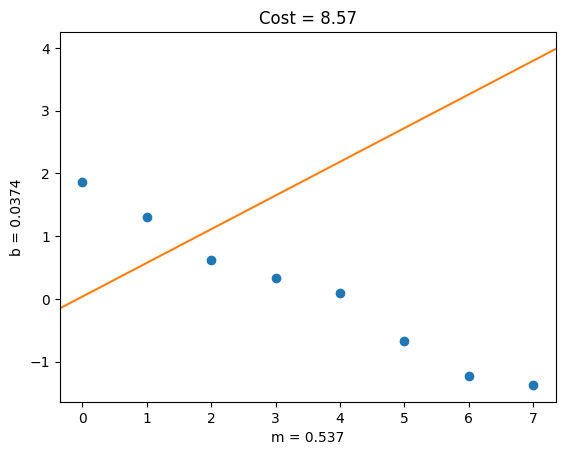

In [123]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

**Rinse and Repeat**

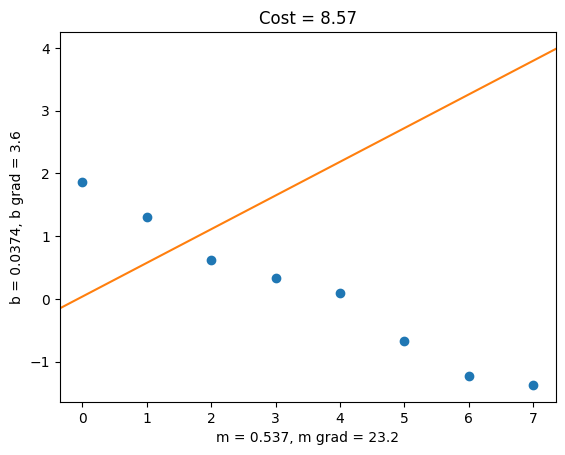

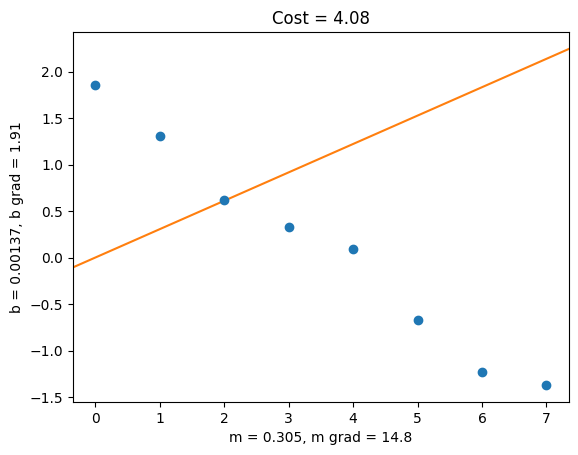

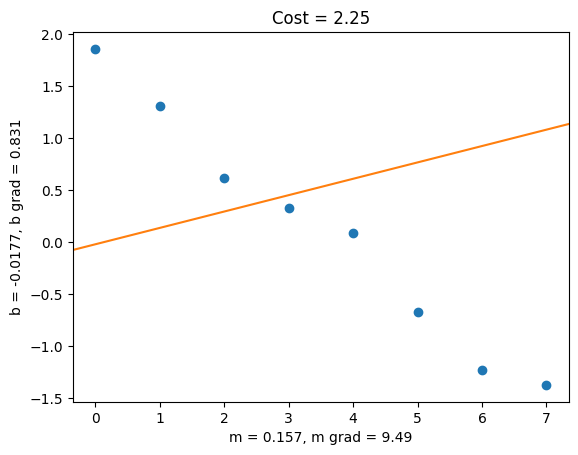

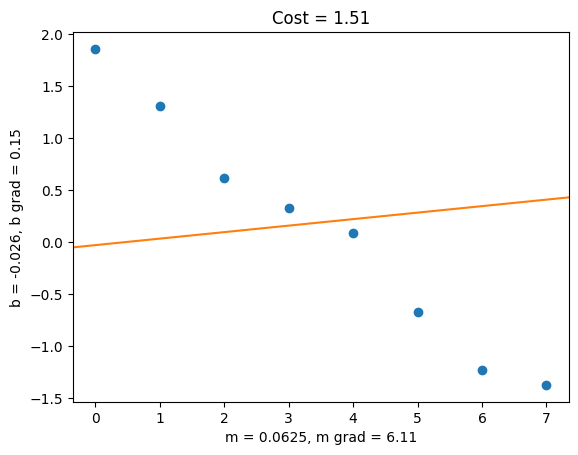

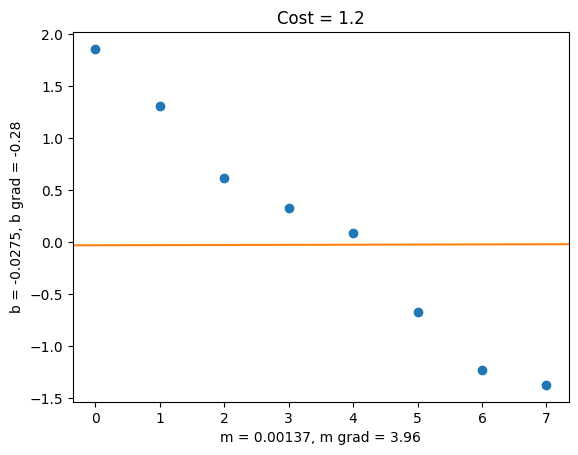

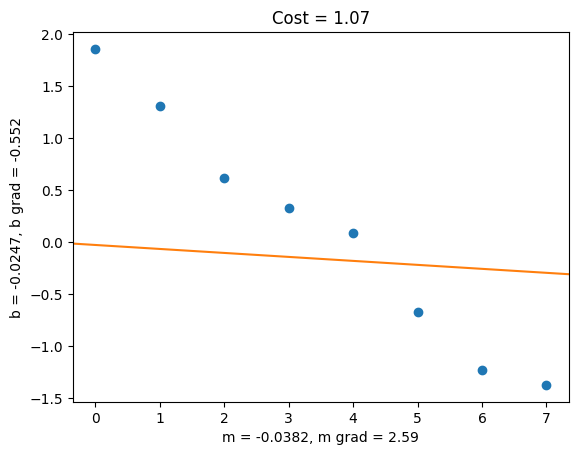

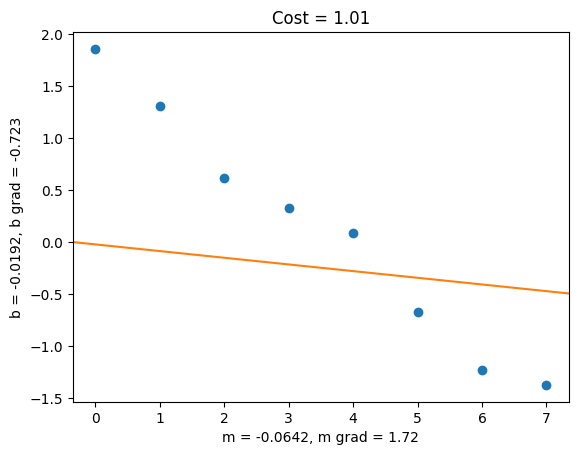

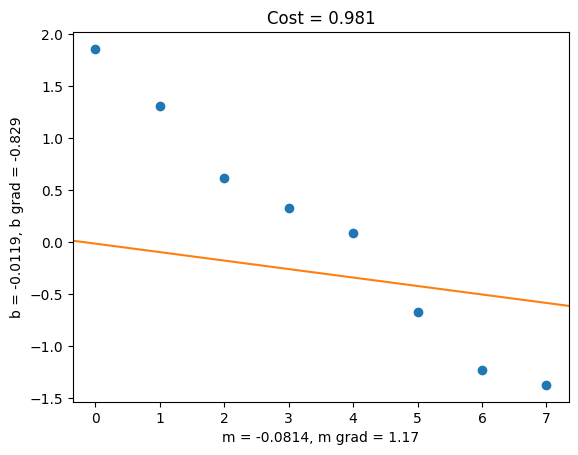

In [124]:
epochs = 8
for epoch in range(epochs):

    optimizer.zero_grad() # Reset gradients to zero; else they accumulate

    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2

    C.backward() # Step 3

    labeled_regression_plot(xs, ys, m, b, C)

    optimizer.step() # Step 4

Com mais treino, quando a slope m chega perto da slope representada pelos dados, delC / delb se torna negativo. Indicando assim um relacionamento reverso entre b e o Custo. m continua positivo.

# Integrals

In [127]:
from scipy.integrate import quad # "quadrature" = numerical integration (as opposed to symbolic)ration

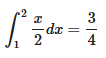

In [125]:
def g(x):
    return x/2

In [134]:
quad(g, 1, 2) # second output é valor de erro absoluto da integral estimado. (essencialmente 0)

(3.0, 3.3306690738754696e-14)

In [133]:
def f(x):
    return 2*x

quad(f,3,4)

(7.0, 7.771561172376096e-14)

## Area under the ROC curve

In [136]:
from sklearn.metrics import auc
# usa regra trapezoide para achar área debaixo da curva

From the slides, the
 coordinates of our hot dog-detecting ROC curve are:

(0, 0)

(0, 0.5)

(0.5, 0.5)

(0.5, 1)

(1, 1)


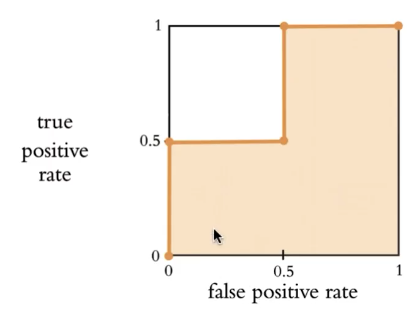


In [137]:
xs = [0, 0, 0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1, 1]

In [138]:
auc(xs, ys)

np.float64(0.75)